In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline

In [2]:
aapl = yf.Ticker('AAPL')

In [3]:
days = 20
hist = aapl.history(period=f'{days}d')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-24 00:00:00-04:00,146.946233,149.981191,145.758201,149.202484,75981900,0.00,0
2022-10-25 00:00:00-04:00,149.841434,152.237468,149.112647,152.087708,74732300,0.00,0
2022-10-26 00:00:00-04:00,150.709995,151.738288,147.794818,149.102661,88194300,0.00,0
2022-10-27 00:00:00-04:00,147.824785,148.803157,143.891307,144.560196,109180200,0.00,0
2022-10-28 00:00:00-04:00,147.954565,157.239166,147.575204,155.482086,164762400,0.00,0
2022-10-31 00:00:00-04:00,152.906350,153.984563,151.668398,153.086044,97943200,0.00,0
2022-11-01 00:00:00-04:00,154.823169,155.192551,148.883026,150.400497,80379300,0.00,0
2022-11-02 00:00:00-04:00,148.703316,151.917985,144.759861,144.789810,93604600,0.00,0
2022-11-03 00:00:00-04:00,141.824736,142.563516,138.520220,138.650009,97918500,0.00,0


In [4]:
hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
hist.index = hist.index.strftime('%d %B %Y')

In [6]:
hist = hist[['Close']]
hist.columns = ['apple']
hist.head()

,apple
Date,
24 October 2022,149.202484
25 October 2022,152.087708
26 October 2022,149.102661
27 October 2022,144.560196
28 October 2022,155.482086


In [19]:
hist = hist.T
hist

In [21]:
hist.index.name = 'Name'
hist

Date,24 October 2022,25 October 2022,26 October 2022,27 October 2022,28 October 2022,31 October 2022,01 November 2022,02 November 2022,03 November 2022,04 November 2022,07 November 2022,08 November 2022,09 November 2022,10 November 2022,11 November 2022,14 November 2022,15 November 2022,16 November 2022,17 November 2022,18 November 2022
Name,,,,,,,,,,,,,,,,,,,,
apple,149.202484,152.087708,149.102661,144.560196,155.482086,153.086044,150.400497,144.78981,138.650009,138.380005,138.919998,139.5,134.869995,146.869995,149.699997,148.279999,150.039993,148.789993,150.720001,151.289993


In [2]:
def get_data(days, tickers):
    df = pd.DataFrame()
    for company in tickers.keys():
        #company = 'apple'
        tkr = yf.Ticker(tickers[company])
        hist = tkr.history(period=f'{days}d')
        hist.index = hist.index.strftime('%d %B %Y')
        hist = hist[['Close']]
        hist.columns = [company]
        hist = hist.T
        hist.index.name = 'Name'
        df = pd.concat([df, hist])
    return df

In [3]:
days = 20
tickers = {
    'apple': 'AAPL',
    'facebook': 'META',
    'google': 'GOOGL',
    'microsoft': 'MSFT',
    'netflix': 'NFLX',
    'amazon': 'AMZN',
}

In [4]:
import altair as alt

In [5]:
df = get_data(days, tickers)

In [6]:
df

Date,24 October 2022,25 October 2022,26 October 2022,27 October 2022,28 October 2022,31 October 2022,01 November 2022,02 November 2022,03 November 2022,04 November 2022,07 November 2022,08 November 2022,09 November 2022,10 November 2022,11 November 2022,14 November 2022,15 November 2022,16 November 2022,17 November 2022,18 November 2022
Name,,,,,,,,,,,,,,,,,,,,
apple,149.202484,152.087708,149.102661,144.560196,155.482086,153.086044,150.400497,144.789810,138.650009,138.380005,138.919998,139.500000,134.869995,146.869995,149.699997,148.279999,150.039993,148.789993,150.720001,151.289993
facebook,129.720001,137.509995,129.820007,97.940002,99.199997,93.160004,95.199997,90.540001,88.910004,90.790001,96.720001,96.470001,101.470001,111.870003,113.019997,114.220001,117.080002,113.230003,111.449997,112.050003
google,102.519997,104.480003,94.930000,92.220001,96.290001,94.510002,90.470001,86.970001,83.430000,86.580002,88.489998,88.900002,87.320000,93.940002,96.410004,95.699997,98.440002,98.849998,98.360001,97.430000
microsoft,246.555176,249.955582,230.669937,226.112778,235.207138,231.477661,227.528793,219.481476,213.647903,220.767838,227.229630,228.226822,223.879074,242.297165,246.415558,240.871185,241.290009,241.729996,241.679993,241.220001
netflix,282.450012,291.019989,298.619995,296.940002,295.720001,291.880005,286.750000,273.000000,269.059998,260.790009,258.600006,263.459991,254.660004,274.970001,290.130005,299.269989,310.200012,306.019989,295.279999,287.980011
amazon,119.820000,120.599998,115.660004,110.959999,103.410004,102.440002,96.790001,92.120003,89.300003,90.980003,90.529999,89.980003,86.139999,96.629997,100.790001,98.489998,98.940002,97.120003,94.849998,94.139999


In [7]:
companies = ['apple', 'facebook']
data = df.loc[companies]

In [8]:
data.sort_index()

Date,24 October 2022,25 October 2022,26 October 2022,27 October 2022,28 October 2022,31 October 2022,01 November 2022,02 November 2022,03 November 2022,04 November 2022,07 November 2022,08 November 2022,09 November 2022,10 November 2022,11 November 2022,14 November 2022,15 November 2022,16 November 2022,17 November 2022,18 November 2022
Name,,,,,,,,,,,,,,,,,,,,
apple,149.202484,152.087708,149.102661,144.560196,155.482086,153.086044,150.400497,144.789810,138.650009,138.380005,138.919998,139.500000,134.869995,146.869995,149.699997,148.279999,150.039993,148.789993,150.720001,151.289993
facebook,129.720001,137.509995,129.820007,97.940002,99.199997,93.160004,95.199997,90.540001,88.910004,90.790001,96.720001,96.470001,101.470001,111.870003,113.019997,114.220001,117.080002,113.230003,111.449997,112.050003


In [9]:
data = data.T.reset_index()
data.head()

Name,Date,apple,facebook
0,24 October 2022,149.202484,129.720001
1,25 October 2022,152.087708,137.509995
2,26 October 2022,149.102661,129.820007
3,27 October 2022,144.560196,97.940002
4,28 October 2022,155.482086,99.199997


In [10]:
data = pd.melt(data, id_vars=['Date']).rename(
    columns={'value':'Stock Prices(USD)'}
)
data

,Date,Name,Stock Prices(USD)
0,24 October 2022,apple,149.202484
1,25 October 2022,apple,152.087708
2,26 October 2022,apple,149.102661
3,27 October 2022,apple,144.560196
4,28 October 2022,apple,155.482086
5,31 October 2022,apple,153.086044
6,01 November 2022,apple,150.400497
7,02 November 2022,apple,144.789810
8,03 November 2022,apple,138.650009
9,04 November 2022,apple,138.380005


In [33]:
ymin, ymax = 85,140

chart = (
    alt.Chart(data)
    .mark_line(opacity=0.8, clip=True)
    .encode(
        x = "Date:T",
        y = alt.Y("Stock Prices(USD):Q", stack=None, scale=alt.Scale(domain=[ymin,ymax])),
        color = 'Name:N'
    )
)

In [34]:
chart

alt.Chart(...)

In [19]:
!pip freeze

altair==4.2.0
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.1.0
attrs==22.1.0
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
blinker==1.5
cachetools==5.2.0
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
click==8.1.3
colorama==0.4.6
commonmark==0.9.1
contourpy==1.0.6
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==1.2.0
fastjsonschema==2.16.2
fonttools==4.38.0
gitdb==4.0.9
GitPython==3.1.29
idna==3.4
importlib-metadata==5.0.0
ipykernel==6.17.1
ipython==8.6.0
ipython-genutils==0.2.0
jedi==0.18.1
Jinja2==3.1.2
json5==0.9.10
jsonschema==4.17.0
jupyter-server==1.23.2
jupyter_client==7.4.7
jupyter_core==5.0.0
jupyterlab==3.5.0
jupyterlab-pygments==0.2.2
jupyterlab_server==2.16.3
kiwisolver==1.4.4
lxml==4.9.1
MarkupSafe==2.1.1
matplotlib==3.6.2
matplotlib-inline==0.1.6
mistune==2.0.4
multitasking==0.0.11
nbclassic==0.4.8
nbclient==0.7.0
nbconvert==7.2.5
nbformat==5.7.0
nest-

In [9]:
aapl = yf.Ticker('AAPL')

In [10]:
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 164000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand rad

In [12]:
aapl.actions.head()

,Dividends,Stock Splits
Date,,
1987-05-11 00:00:00-04:00,0.000536,0.0
1987-06-16 00:00:00-04:00,0.000000,2.0
1987-08-10 00:00:00-04:00,0.000536,0.0
1987-11-17 00:00:00-05:00,0.000714,0.0
1988-02-12 00:00:00-05:00,0.000714,0.0


<AxesSubplot: xlabel='Date'>

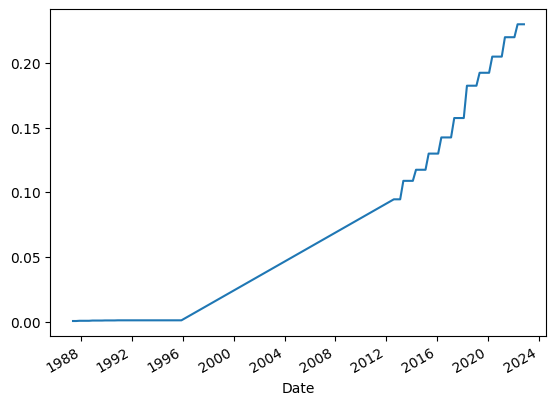

In [13]:
aapl.dividends.plot()

<AxesSubplot: xlabel='Date'>

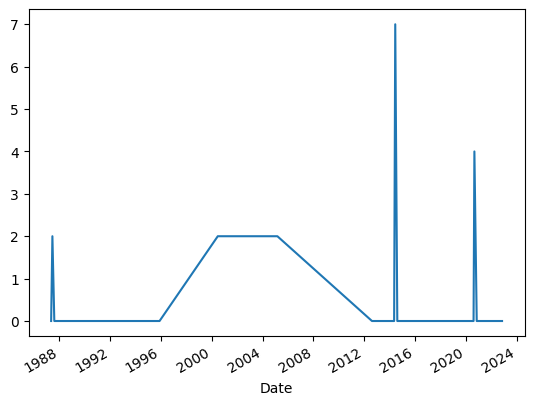

In [15]:
aapl.actions['Stock Splits'].plot()